In [296]:
%pip install ipykernel numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Постановка задачі: реалізувати одношаровий персептрон

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score

### Реалізувати одношаровий персептрон, використовуючи такі мови програмування як Python, C++

In [298]:
class PerceptronRosenblatt:
    def __init__(self, learning_rate: int = 0.1, iterations: int = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        X_ = np.insert(X, 2, -1, axis=1)
        # X_ = X.copy()
        self.weights = np.zeros(X_.shape[1])
        for _ in range(self.iterations):
            for i, x in enumerate(X_):
                y_pred = self.weights @ x
                y_pred = int(np.sign(y_pred))
                if y_pred != y[i]:
                    self.weights += self.learning_rate * y[i] * x

    def predict(self, X):
        y_pred = []
        X_ = np.insert(X, 2, -1, axis=1)
        # X_ = np.insert(X, 0, 1, axis=1)
        # X_ = X.copy()
        for x in X_:
            y = self.weights @ x
            y = int(np.sign(y))
            y_pred.append(y)
        return np.array(y_pred)

### На основі відповідного файлу (ім’я dataномер_варіанту.csv) необхідно випадковим чином сформувати навчальну та тестову вибірки (у співвідношенні 70:30). Навчити нейронну мережу на навчальній вибірці, використовуючи алгоритм Розенблатта.

In [299]:
filename = 'data/data10.csv'
df = pd.read_csv(filename, names=["X1", "X2", "y"], sep=";")
df.head()

,X1,X2,y
0,0.195,0.186,0
1,0.144,0.229,0
2,0.701,0.677,1
3,0.735,0.481,1
4,0.713,0.307,1


In [300]:
X = df.drop(columns="y").to_numpy()
y = df.y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 2) (70,) (30, 2) (30,)


### Перевірити роботу персептрона на тестових даних. Порівняти результати з аналогічними результатами, які отримані в результаті використання вбудованих функцій.

In [301]:
perceptron = PerceptronRosenblatt()
perceptron.fit(X_train, y_train)

print("[Weights]:", perceptron.weights)

[Weights]: [ 0.094   0.0806 -0.1   ]


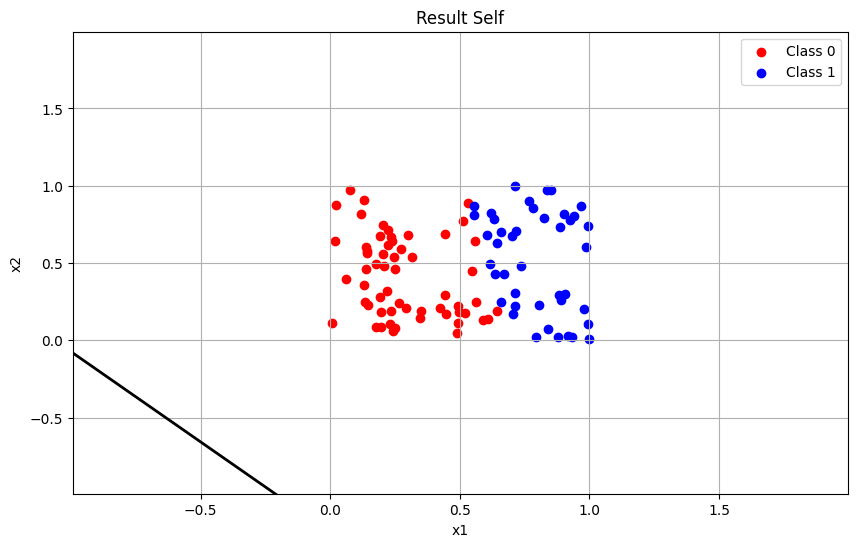

In [302]:
def plot_decision_boundary(X, y, model, title="Розділяюча пряма"):
    plt.figure(figsize=(10, 6))

    plt.scatter(*X[y == 0].T, color='red', label='Class 0')
    plt.scatter(*X[y == 1].T, color='blue', label='Class 1')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx = np.linspace(x_min, x_max, 100)
    # Побудова розділяючої лінії
    # Рівняння: w1*x1 + w2*x2 + w3*(-1) = 0  (де w3 - це bias вага, що відповідає tau)
    # Звідси виразимо x2: w2*x2 = w3 - w1*x1  =>  x2 = (w3 - w1*x1) / w2
    w = model.weights
    yy = np.linspace(y_min, y_max, 100)
    if w.shape[0] == 3:
        w1, w2, w3 = w[0], w[1], w[2]
        yy = (w3 - w1*xx) / w2
    plt.plot(xx, yy, 'k-', linewidth=2)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, perceptron, title="Result Self")

[Self implementation]: 43.33%
[Sklearn implementation]: 100.00%


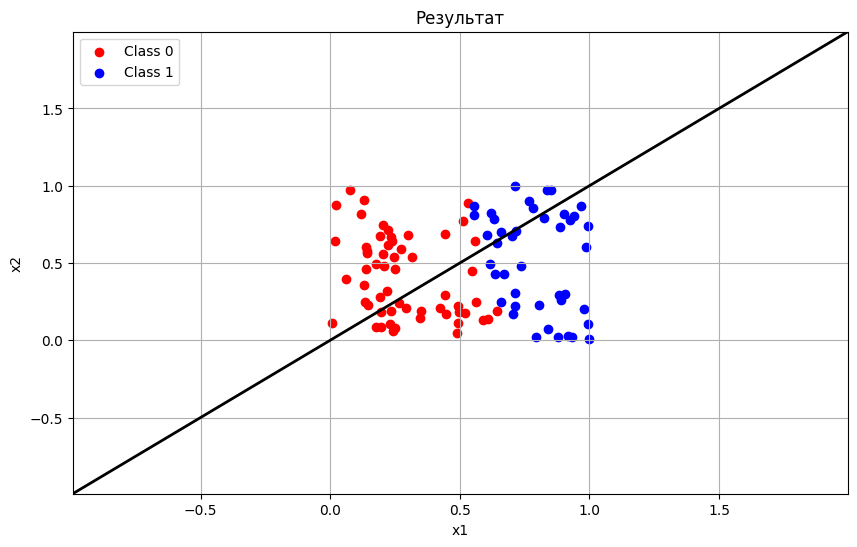

In [303]:
y_pred_custom = perceptron.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"[Self implementation]: {accuracy_custom * 100:.2f}%")


clf = SklearnPerceptron(max_iter=1000, tol=None, random_state=42)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"[Sklearn implementation]: {accuracy_sklearn * 100:.2f}%")

clf.weights = clf.coef_[0]
plot_decision_boundary(X, y, clf, title="Результат")

In [304]:
perceptron.weights

array([ 0.094 ,  0.0806, -0.1   ])

In [305]:
clf.coef_

array([[10.009,  1.879]])

### Результати роботи оформити звітом, який має містити: постановку задачі, навчальну вибірку даних та їх представлення у графічному виді на $R^2$, результати роботи на тестовій множині даних, параметри персептрона, що навчився, вихідний код програми.

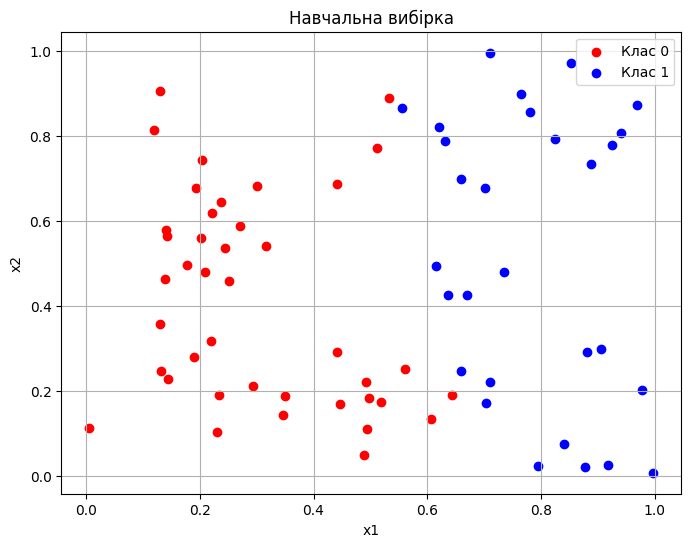

In [306]:
plt.figure(figsize=(8, 6))
plt.scatter(*X_train[y_train==0].T, color='red', label='Клас 0')
plt.scatter(*X_train[y_train==1].T, color='blue', label='Клас 1')
plt.title('Навчальна вибірка')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()